What this notebook does:
* output different galaxy samples with various size and sampling strategy
* file-naming convention: `F5_photoz_pt75_to_8_<NUM_OF_GAL>.h5`


In [22]:
from __future__ import (division, print_function)

In [23]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [24]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import sys
# sys.path.append("../../MagicBeans/machinery/")
import prepare_catalog_for_threshing as prep

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import h5py

# import custom function

In [27]:
import select_gal_sample as select
from scipy.spatial import distance

In [28]:
plt.rcParams['figure.figsize'] = (8, 6)

In [29]:
df = pd.read_hdf("F5_gold_sample.h5", "df")

In [30]:
# fix column names to be less annoying
df.columns = [col.split('.')[1] for col in df.columns]

In [31]:
f = h5py.File("gold_sample_h5py.h5")

In [32]:
df.shape

(234679, 12)

# pick a redshift range

In [33]:
photoz_cuts = (.75, 0.8)
photoz_mask = np.logical_and(df['z_b'] < photoz_cuts[1], 
                             df['z_b'] > photoz_cuts[0])

In [34]:
import seaborn as sns
sns.set_style('white')

In [35]:
import statsmodels as sm
kde = sm.nonparametric.kde.KDEUnivariate(df.z_b)
kde.fit()

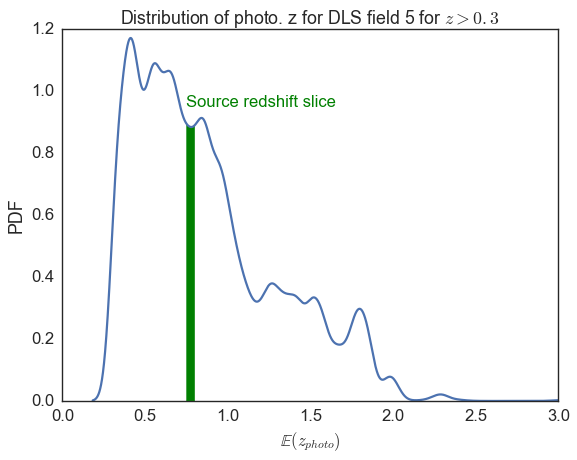

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density, lw=2)
mask = np.logical_and(kde.support > 0.75, kde.support < 0.8)
ax.fill_between(kde.support[mask], 0, kde.density[mask], color='g',
                )
ax.text(0.75, 0.95, 'Source redshift slice', color='g', size=15)
ax.set_xlabel(r'$\mathbb{E}(z_{photo})$', size=15)
ax.set_ylabel('PDF', size=16)
ax.set_xlim(0, 3)
ax.set_title('Distribution of photo. z for DLS field 5 for $z > 0.3$', 
             size=16)
plt.savefig('DLS_photoz.pdf', bbox_inches='tight')

In [37]:
df[photoz_mask].shape[0]

8407

## Visualize the features 

In [38]:
from pandas.tools.plotting import scatter_matrix

In [39]:
df[photoz_mask].describe()

,alpha,delta,r,e1,e2,de,a,b,processflags,z_b,flux_radius,Dlsqc_prob
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407,8407.000000,8407.000000,8407.000000
mean,209.820105,-11.051370,23.507519,0.004560,-0.004317,0.101582,1.989615,1.036978,0,0.775802,2.909432,0.000383
std,0.591095,0.572832,0.891399,0.253246,0.232786,0.064331,1.045302,0.505752,0,0.010968,0.706315,0.004568
min,208.800121,-12.063484,21.005300,-0.793309,-0.823150,0.006386,0.442485,0.400019,0,0.760000,1.543050,0.000000
25%,209.294554,-11.539614,22.903200,-0.149388,-0.151360,0.047174,1.295925,0.674244,0,0.770000,2.419460,0.000000
50%,209.797999,-11.054613,23.565300,0.006204,-0.003006,0.089556,1.773410,0.930168,0,0.780000,2.765680,0.000000
75%,210.339749,-10.564829,24.169300,0.163374,0.143024,0.147661,2.421105,1.273035,0,0.780000,3.218120,0.000000
max,210.869082,-10.037153,26.353100,0.779452,0.840593,0.249962,14.888200,7.056450,0,0.790000,13.600100,0.098008


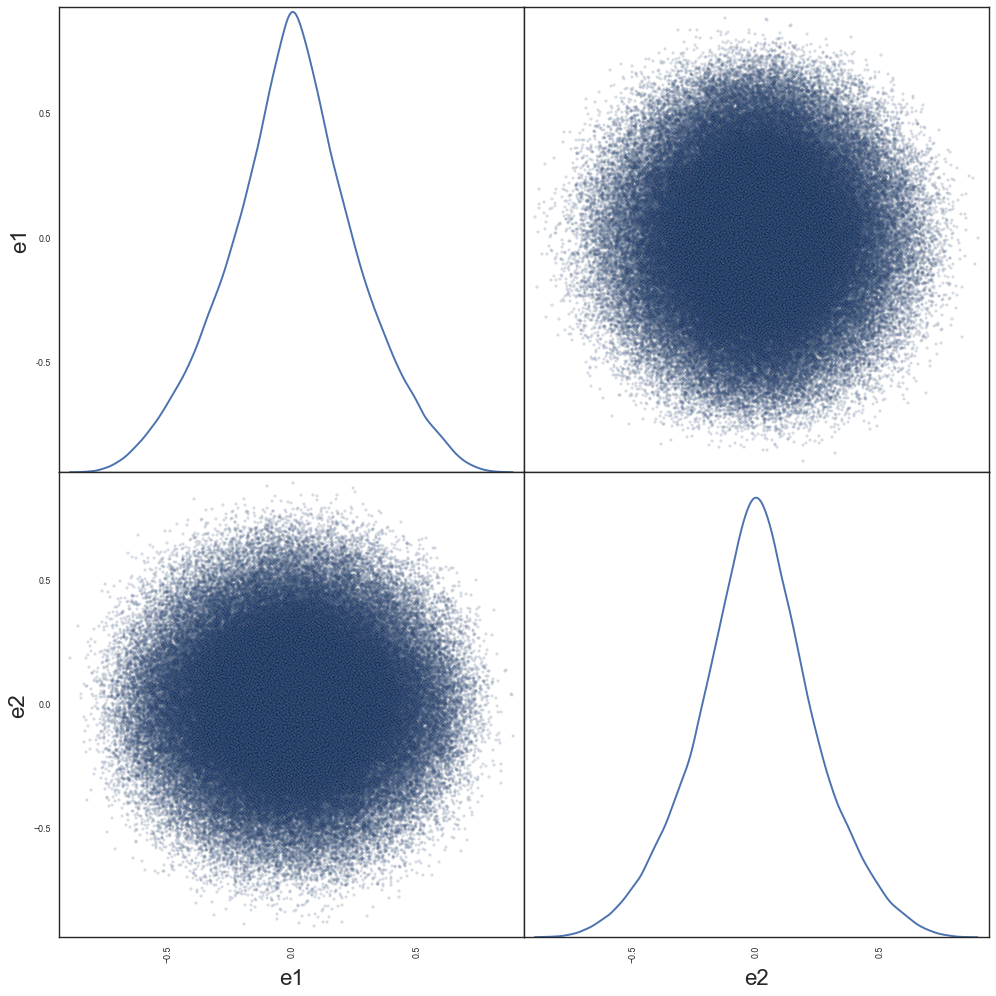

In [40]:
_ = scatter_matrix(df[['e1','e2']], 
               diagonal='kde', alpha=0.2, figsize=(15, 15))

No bimodal distribution for ellipticties

# full sample of galaxies

Non-zero min dist =  0.000436623739626
Non-zero min normalized dist =  0.000157025745573


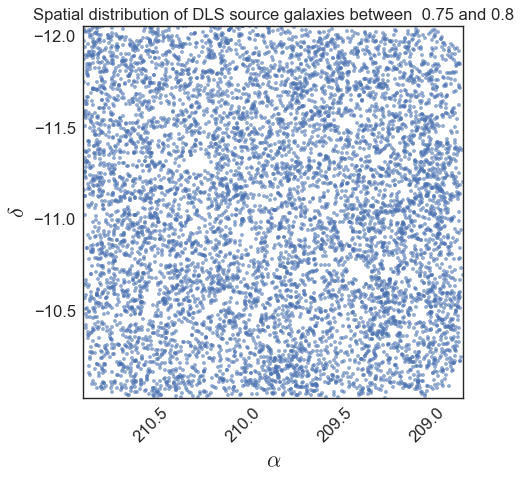

In [41]:
select.plot_spatial_distribution(
    df[photoz_mask], 
    title='Spatial distribution of DLS source galaxies between '
    + ' {0} and {1}'.format(*photoz_cuts), alpha=.6
    )

# to subset the df we have to randomly sample indices

In [42]:
idx = np.random.choice(range(df[photoz_mask].shape[0]), 
                       size=8192)

# in subsets of size 1024

In [43]:
no_of_batch = 8
batch_size = 8192 // 8
total_size = 8192
datasets = [idx[batch_size * i:batch_size *(i + 1)] 
            for i in range(8)]

Non-zero min dist =  0.000446814469325
Non-zero min normalized dist =  0.000162329632253


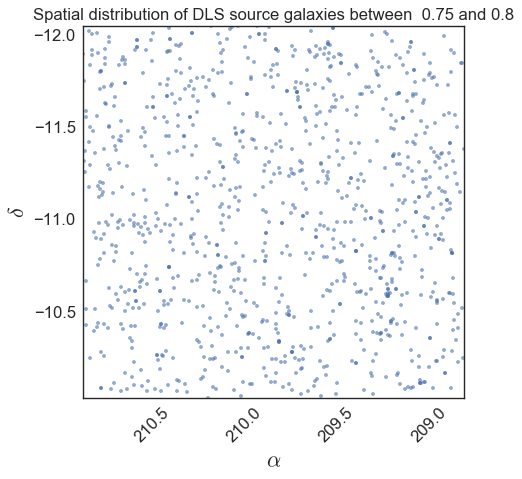

Non-zero min dist =  0.00109678141851
Non-zero min normalized dist =  0.000406471329775


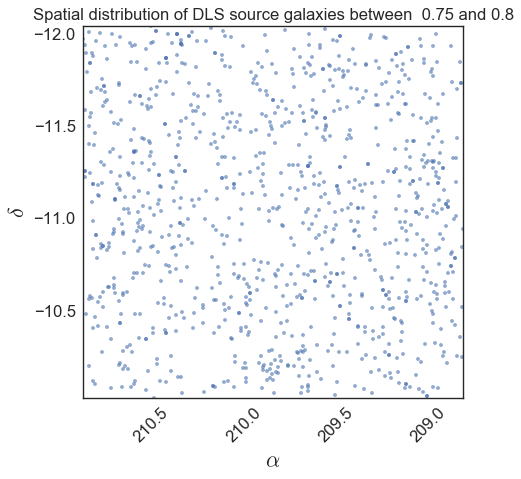

Non-zero min dist =  0.00174689920145
Non-zero min normalized dist =  0.000636369543893


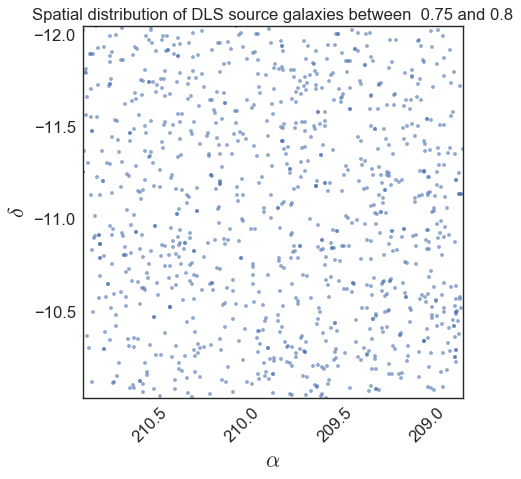

Non-zero min dist =  0.000985009487287
Non-zero min normalized dist =  0.000355544687332


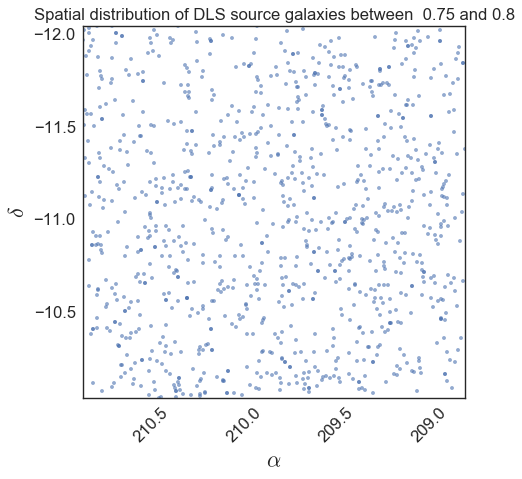

Non-zero min dist =  0.000869087728599
Non-zero min normalized dist =  0.000320737792985


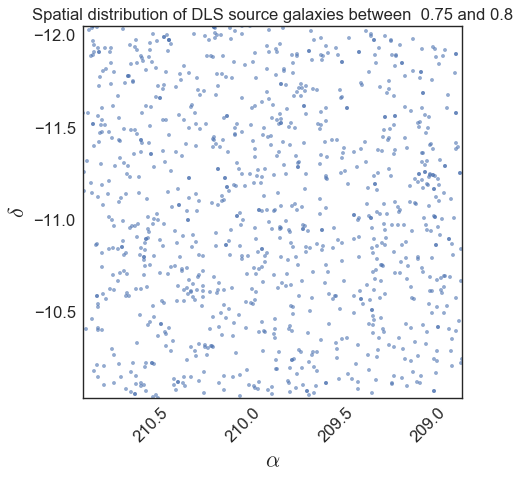

Non-zero min dist =  0.00121384663365
Non-zero min normalized dist =  0.000450814246132


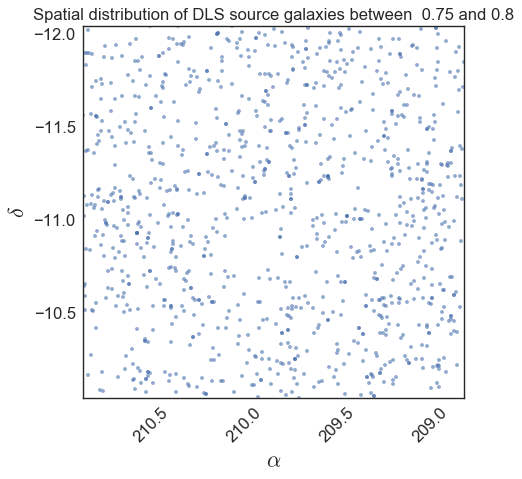

Non-zero min dist =  0.000525650692
Non-zero min normalized dist =  0.000192164981255


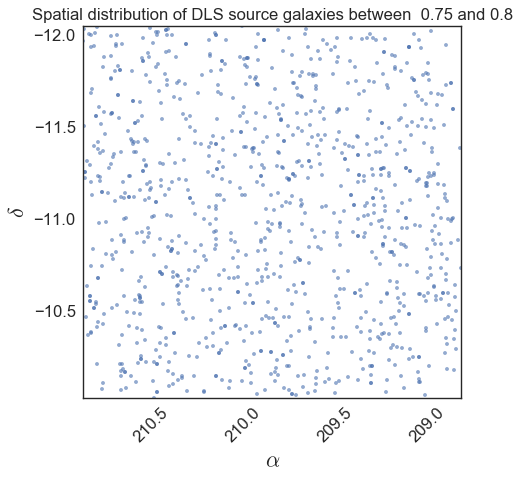

Non-zero min dist =  0.000869087728599
Non-zero min normalized dist =  0.000312555493818


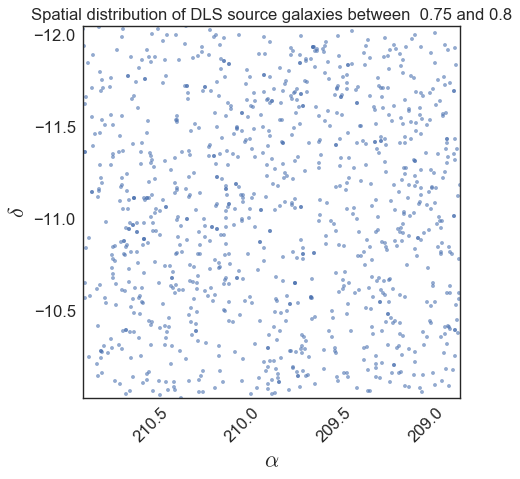

In [44]:
for ds in datasets:
    select.plot_spatial_distribution(
        df[photoz_mask].iloc[ds], 
        title='Spatial distribution of DLS source galaxies between '
        + ' {0} and {1}'.format(*photoz_cuts), alpha=.6
    )
    plt.show()
    plt.close()

In [45]:
for i, ds in enumerate(datasets):
    out_filepath = "../../MagicBeans/dls/"
    outfile_name = "F5_photoz_pt75_to_pt8_{0}_set{1}.h5".format(batch_size, i)
    thisdf = df[photoz_mask].iloc[ds].reset_index()
    thisdf.to_hdf(outfile_name, "df")
    fake_reaper_file = "reaper_F5_" + outfile_name[3:]
    reaper = prep.CatalogToReaper(outfile_name, "e1", "e2", "de", "alpha", 
                              "delta", "z_b", r_col=15)
    reaper.Save(out_filepath + fake_reaper_file)
    print ("Outputting file to ", out_filepath + fake_reaper_file)

input file:  F5_photoz_pt75_to_pt8_1024_set0 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.8555 10.96
input de range: 0.00638594 0.249248
input catalog size: 1024
WARNING masking occurred: down-selected catalog size: 1024
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file to  ../../MagicBeans/dls/reaper_F5_photoz_pt75_to_pt8_1024_set0.h5
input file:  F5_photoz_pt75_to_pt8_1024_set1 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.75992 11.7377
input de range: 0.00638594 0.249081
input catalog size: 1024
WARNING masking occurred: down-selected catalog size: 1024
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file to  

# in subsets of size 2048

In [146]:
datasets = [idx[2048 * i:2048 *(i + 1)] for i in range(4)]

In [152]:
datasets

[array([2019, 1506, 8304, ..., 7304, 2233, 1218]),
 array([5694, 4428, 5477, ..., 5038, 2582, 6406]),
 array([4575, 6870, 8280, ..., 5366, 4677,  433]),
 array([3603,   23, 7901, ..., 6979, 6522, 2066])]

Non-zero min dist =  0.000797076941071
Non-zero min normalized dist =  0.000291428920357


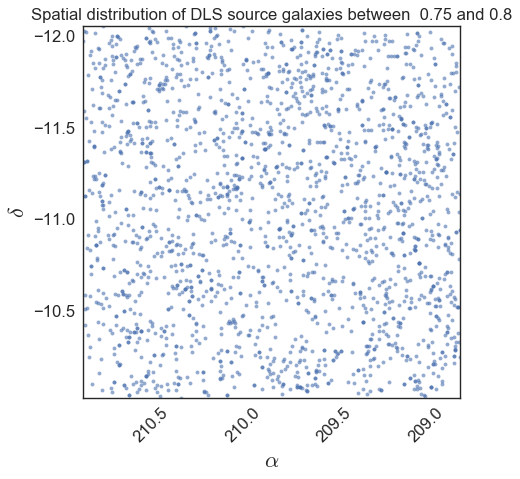

Non-zero min dist =  0.000986417117654
Non-zero min normalized dist =  0.000361227827839


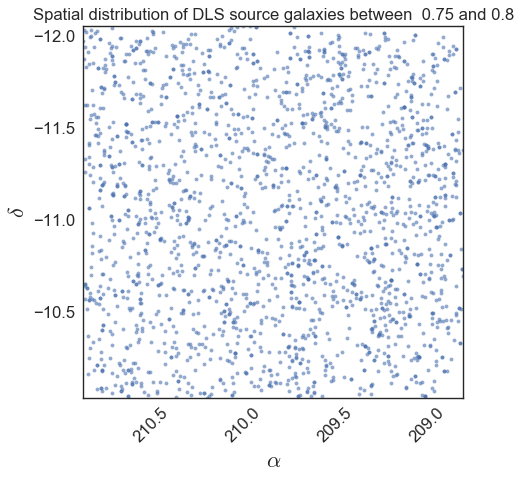

Non-zero min dist =  0.000559850274633
Non-zero min normalized dist =  0.000204374219651


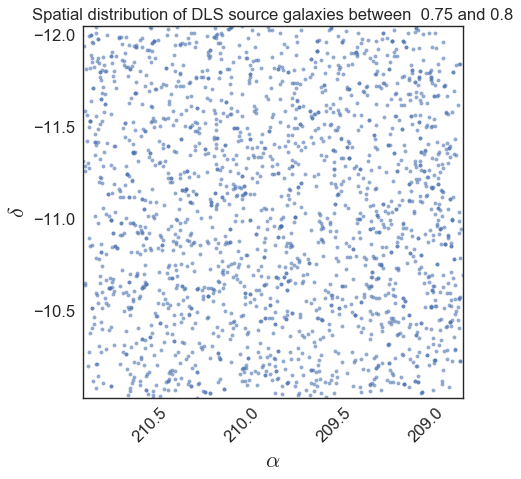

Non-zero min dist =  0.000446814469325
Non-zero min normalized dist =  0.000164760088346


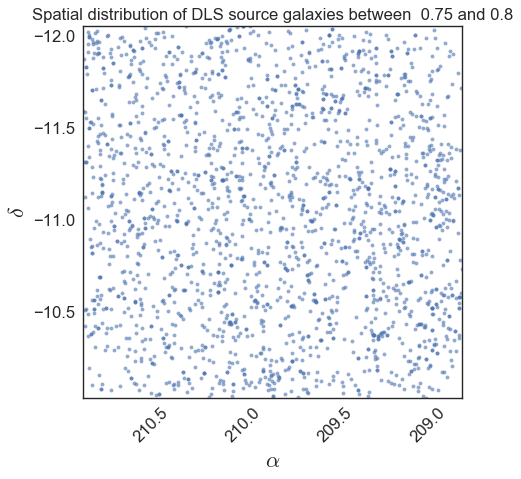

In [156]:
for ds in datasets:
    select.plot_spatial_distribution(
        df[photoz_mask].iloc[ds], 
        title='Spatial distribution of DLS source galaxies between '
        + ' {0} and {1}'.format(*photoz_cuts), alpha=.6
    )
    plt.show()
    plt.close()

# visualize the variation of ellipticity at each galaxy location

In [121]:
norm_dist_mtx, dist_mtx = select.print_spatial_dist_stat(F5_2000_slice)

Non-zero min dist =  0.000525650692
Non-zero min normalized dist =  0.000195165534178


In [184]:
np.sqrt(df[photoz_mask].iloc[ds]['e1'] ** 2 + 
        df[photoz_mask].iloc[ds]['e2'] ** 2)

57558     0.099748
45338     0.243843
232337    0.378172
144269    0.288208
233250    0.164650
105179    0.199758
12185     0.364147
56934     0.287857
46009     0.055008
179825    0.548724
44515     0.315357
94727     0.188581
150367    0.369697
165804    0.136329
172330    0.091595
148417    0.328816
65827     0.225563
144749    0.220424
215330    0.422543
76664     0.171292
132189    0.154675
86781     0.527529
199548    0.207812
44579     0.205049
82964     0.413806
167041    0.240094
202230    0.120334
96547     0.005259
67599     0.206262
9291      0.316848
            ...   
944       0.201400
28823     0.374525
155113    0.430847
205065    0.684888
227289    0.435834
205207    0.293832
144917    0.295695
15383     0.038740
166935    0.113823
214575    0.151164
180046    0.490282
210462    0.346470
77868     0.067870
7020      0.455135
118483    0.212763
75288     0.401220
50181     0.094651
12496     0.295961
35310     0.323060
211679    0.404032
73395     0.277233
172414    0.

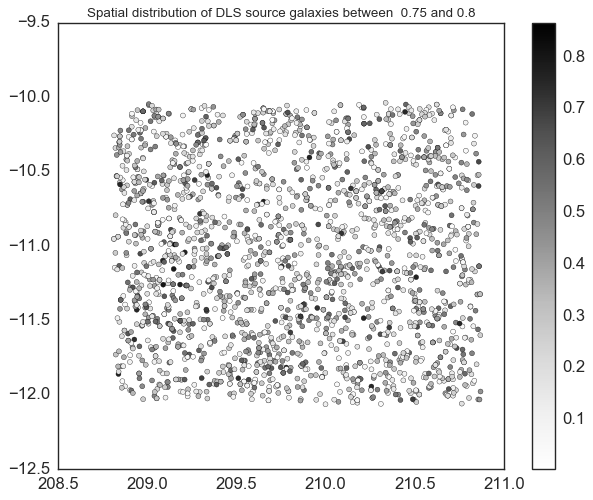

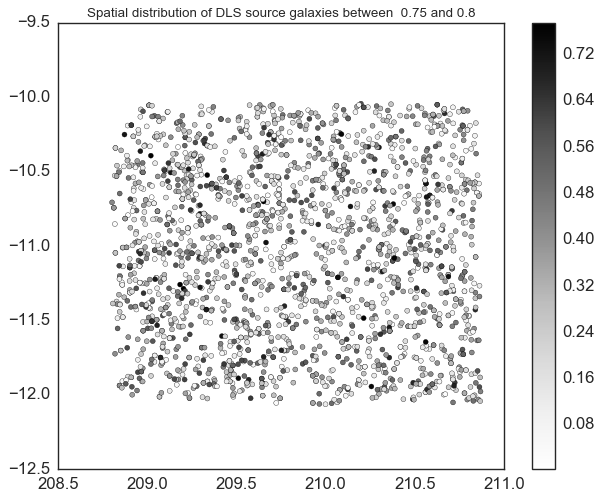

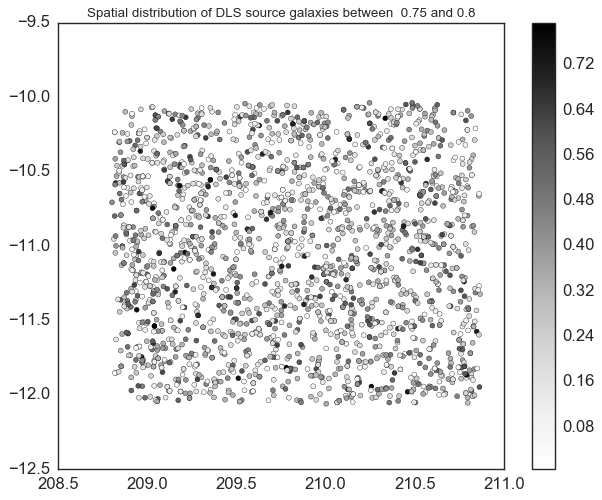

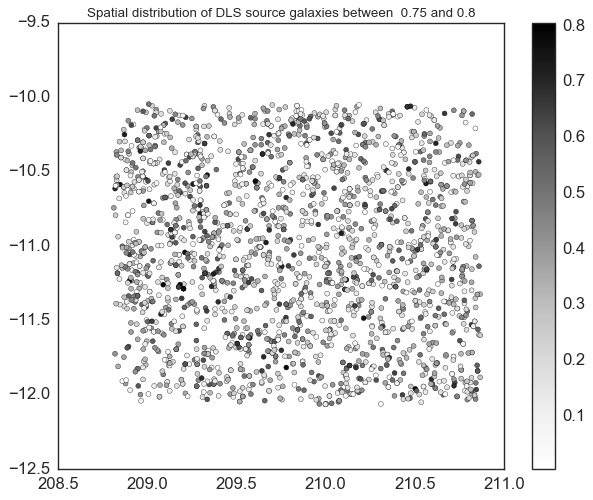

In [186]:
for ds in datasets:
    plt.scatter(
        df[photoz_mask].iloc[ds]['alpha'], 
        df[photoz_mask].iloc[ds]['delta'],
        c=np.sqrt(df[photoz_mask].iloc[ds]['e1'] ** 2 + 
                  df[photoz_mask].iloc[ds]['e2'] ** 2))
    
    plt.title('Spatial distribution of DLS source galaxies between '
        + ' {0} and {1}'.format(*photoz_cuts)
    )
    plt.colorbar()
    plt.show()
    plt.close()

# save the full outputs

In [181]:
for i, ds in enumerate(datasets):
    out_filepath = "../../MagicBeans/dls/"
    outfile_name = "F5_photoz_pt75_to_pt8_2048_set{}.h5".format(i)
    thisdf = df[photoz_mask].iloc[ds].reset_index()
    thisdf.to_hdf(outfile_name, "df")
    fake_reaper_file = "reaper_F5_" + outfile_name[3:]
    reaper = prep.CatalogToReaper(outfile_name, "e1", "e2", "de", "alpha", 
                              "delta", "z_b", r_col=15)
    reaper.Save(out_filepath + fake_reaper_file)
    print ("Outputting file to ", out_filepath + fake_reaper_file)

input file:  F5_photoz_pt75_to_pt8_2048_set0 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.71657 7.98303
input de range: 0.00638594 0.249828
input catalog size: 2048
WARNING masking occurred: down-selected catalog size: 2048
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file to  ../../MagicBeans/dls/reaper_F5_photoz_pt75_to_pt8_2048_set0.h5
input file:  F5_photoz_pt75_to_pt8_2048_set1 .h5
input catalog columns:
['a', 'b', 'de', 'flux_radius', 'z_b', 'r', 'delta', 'alpha', 'Dlsqc_prob', 'e1', 'e2']
input photo-z range: 0.76 0.79
input flux_radius range: 1.75992 13.6001
input de range: 0.00716263 0.249491
input catalog size: 2048
WARNING masking occurred: down-selected catalog size: 2048
Check code and look for `ndx` if you have any doubts.
Normalizing the galaxy spatial coordinates.
Outputting file t